In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# все годы
      t  - температура
      p  - давление
      ws - скорость ветра
    wdir - направление ветра

In [3]:
weather = pd.read_csv('weather.csv', index_col = ['year','month','day'])
weather.shape

(8759, 6)

# Давление

##### среднее и медианное давление

In [4]:
pmean = weather[['p(day)', 'p(night)']].mean().round(2)
pmed = weather[['p(day)', 'p(night)']].median()
print('среднее давление днем составляет:', pmean.loc['p(day)'], 'мм рт.ст.,', 
      'медианное дневное давление:', pmed.loc['p(day)'],
     '\nсреднее давление ночью составляет:', pmean.loc['p(night)'], 'мм рт.ст.,',
     'медианное ночное давление:', pmed.loc['p(night)'],)

среднее давление днем составляет: 747.38 мм рт.ст., медианное дневное давление: 747.0 
среднее давление ночью составляет: 747.39 мм рт.ст., медианное ночное давление: 747.0


##### разница между дневным и вечерним давлением

In [5]:
#добавляем столбец с разницей дневного и вечернего давления по модулю
weather.insert(loc=6, 
               column='pdiff', 
               value=weather[['p(day)', 'p(night)']].apply(lambda row: abs(row['p(day)'] - row['p(night)']), axis=1))

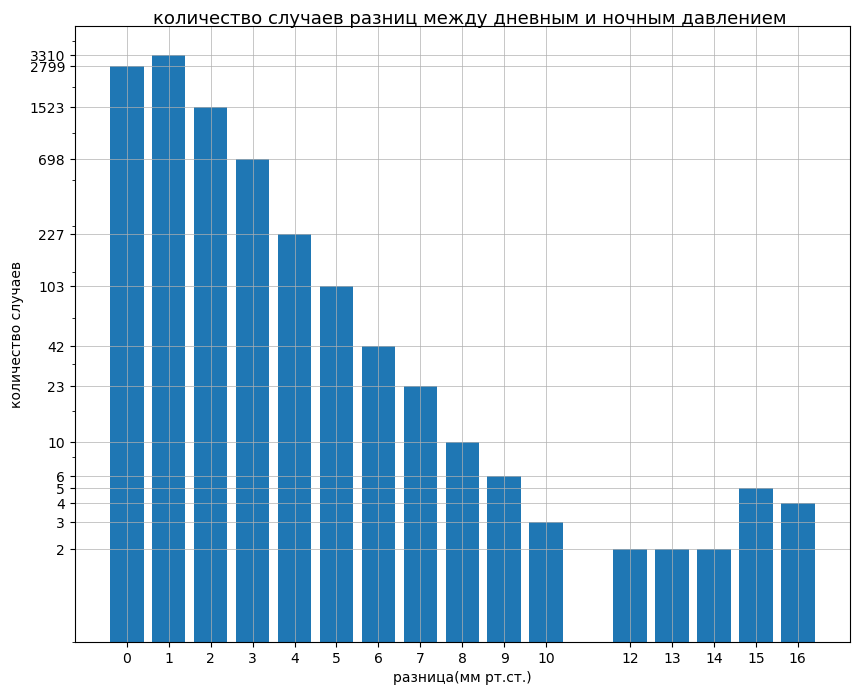

In [33]:
countpdiff = weather.groupby('pdiff')['pdiff'].count()
fig13 = plt.figure(figsize=(10, 8))
fig13.suptitle('количество случаев разниц между дневным и ночным давлением',x=0.52,y=0.90, fontsize=13)
ax_cpd = fig13.add_subplot()
ax_cpd.set_yscale('symlog', base=2)
ax_cpd.bar(x=countpdiff.index.values, height=countpdiff)
ax_cpd.set_xlabel('разница(мм рт.ст.)')
ax_cpd.set_ylabel('количество случаев')
ax_cpd.grid(which='major', lw=0.5)
ax_cpd.xaxis.set_major_locator(FixedLocator(countpdiff.index))
ax_cpd.yaxis.set_major_locator(FixedLocator(np.unique(countpdiff.sort_values().values)))
ax_cpd.yaxis.set_major_formatter(FixedFormatter(np.unique(countpdiff.sort_values().values)))
ax_cpd.tick_params(axis='y', which='major', labelsize=10);

##### межгодовая разница среднего давления

In [7]:
#группируем данные
ygp = weather.groupby('year').agg({'p(day)':'mean', 'p(night)':'mean'}).round(2)
#новый фрейм с годами в index и columns
yearspdiff = pd.DataFrame(columns=weather.index.levels[0], index=weather.index.levels[0][::-1])
#заполняем данными
for i in weather.index.levels[0]:
    for j in weather.index.levels[0]:
        yearspdiff[i].loc[j] = ygp['p(day)'].loc[i] - ygp['p(night)'].loc[j]
yearspdiff = yearspdiff.astype('float64')

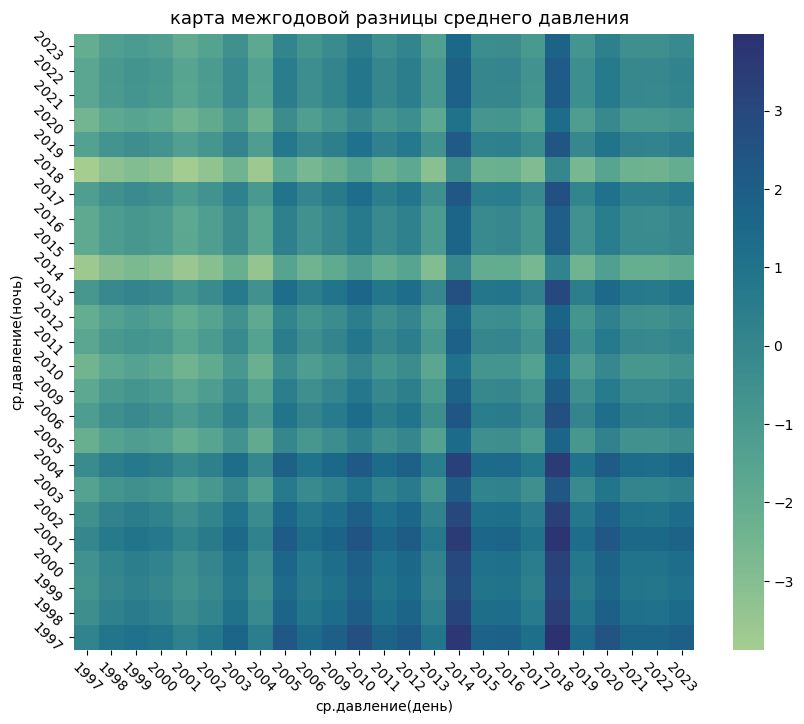

In [55]:
fig14 = plt.figure(figsize=(10, 8))
fig14.suptitle('карта межгодовой разницы среднего давления',x=0.45,y=0.91, fontsize=13)
ax_ypd = fig13.add_subplot()
ax_ypd = sns.heatmap(yearspdiff, cmap='crest')
ax_ypd.tick_params(axis ='x', rotation = -45)
ax_ypd.tick_params(axis ='y', rotation = -45)
ax_ypd.set(xlabel="ср.давление(день)", ylabel="ср.давление(ночь)");

##### годовое среднее давление

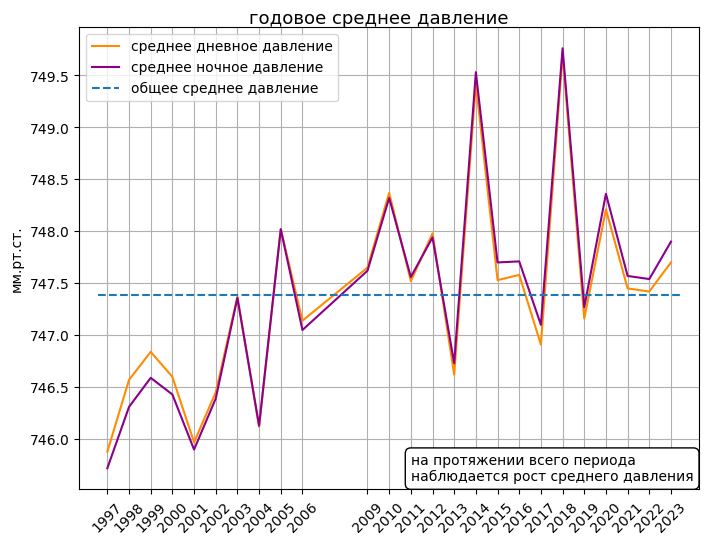

In [97]:
fig15 = plt.figure(figsize=(8, 6))
fig15.suptitle('годовое среднее давление',x=0.5,y=0.91, fontsize=13)
ax_ygp = fig15.add_subplot()
ax_ygp.plot(ygp['p(day)'], label='среднее дневное давление', c='DarkOrange')
ax_ygp.plot(ygp['p(night)'], label='среднее ночное давление', c='DarkMagenta')
ax_ygp.axhline(y=pmean.mean(), xmin=0.03, xmax=0.97, label='общее среднее давление', linestyle='--')
ax_ygp.xaxis.set_major_locator(FixedLocator(ygp.index))
ax_ygp.tick_params(axis ='x', rotation = 45)
ax_ygp.legend(loc=2)
ax_ygp.set_ylabel('мм.рт.ст.')
ax_ygp.text(x=2011, y=745.6, s='на протяжении всего периода\nнаблюдается рост среднего давления', 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'))
ax_ygp.grid();